In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data_df=pd.read_csv("./"+mouse_drug_data_to_load)
trial_data_df=pd.read_csv("./"+clinical_trial_data_to_load)

# Combine the data into a single dataset


# Display the data table for preview

In [2]:
mouse_data_df.head(3)
len(mouse_data_df)

250

In [3]:
trial_data_df.head(3)
len(trial_data_df)

1893

In [4]:
# Combine the data into a single dataset
combined_data_df=pd.merge(trial_data_df, mouse_data_df,  how="outer", on="Mouse ID")

In [5]:
combined_data_df.head(500)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_by_drug_timepoint=combined_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_by_drug_timepoint=pd.DataFrame(mean_tumor_volume_by_drug_timepoint)

# Preview DataFrame
mean_tumor_volume_by_drug_timepoint.reset_index(inplace=True)

In [7]:
mean_tumor_volume_by_drug_timepoint.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_of_tumor_volumes=combined_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

In [9]:
# Convert to DataFrame
std_error_of_tumor_volumes=pd.DataFrame(std_error_of_tumor_volumes)
std_error_of_tumor_volumes.reset_index(inplace=True)

In [10]:
# Preview DataFrame
std_error_of_tumor_volumes.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames
#Original format
mean_tumor_volume_by_drug_timepoint.head(20)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [12]:
#Retoriented/transposed format
df=mean_tumor_volume_by_drug_timepoint #shortening the name of the dataset
#reseting the indexing on the DataFrame and displaying 
#source of discovery: https://github.com/pandas-dev/pandas/issues/8436 https://github.com/jreback
df=df.reset_index().pivot( 'Timepoint','Drug', 'Tumor Volume (mm3)')
df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
# It works! thanks for the contributios of https://github.com/jreback to pandas community




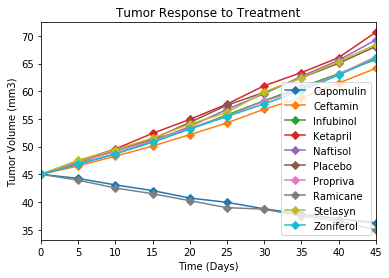

<Figure size 1080x1080 with 0 Axes>

In [14]:
# Generate the Plot (with Error Bars)
lines=df.plot(marker="D")
plt.rcParams["figure.figsize"] = (1,9)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='best')
figure(num=None,figsize=(9,9), dpi=120)
# Save the Figure

# Show the Figure
plt.show()


![image.png](attachment:image.png)

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_by_drug_timepoint=combined_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
mean_met_df=pd.DataFrame(mean_met_by_drug_timepoint)
# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met=combined_data_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
sem_met_df=pd.DataFrame(sem_met)
# Preview DataFrame
sem_met_df.head(50)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
Ketapril  0                  0.000000
          5                  0.098100
          10                 0.142018
          15                 0.191381
          20                 0.236680
          25                 0.288275
          30                 0.347467
          35                 0.361418
          40                 0.315725
          45                 0.278722
Naftisol  0                  0.000000
          5                  0.093618
          10                 0.163577
          15                 0.158651
          20                 0.181731
          25                 0.185240
          30                 0.266667
          35                 0.330464
          40                 0.321702
          45                 0.351104

In [17]:
# Minor Data Munging to Re-Format the Data Frames
met_df=sem_met_df.reset_index().pivot( 'Timepoint','Drug', 'Metastatic Sites')
# Preview that Reformatting worked
met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


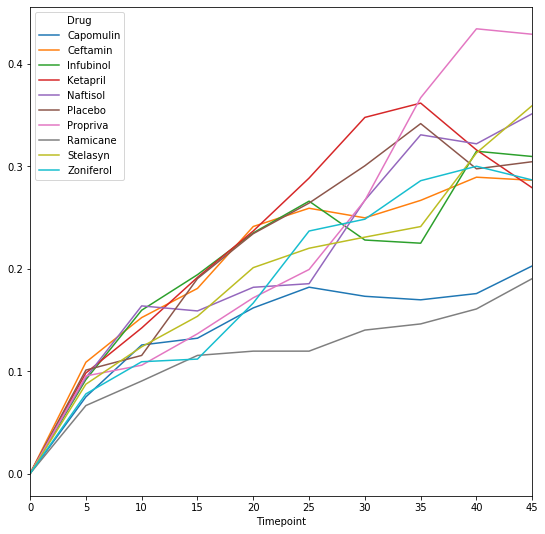

In [18]:
# Generate the Plot (with Error Bars)
plt.rcParams["figure.figsize"] = (9,9)
lines=met_df.plot()
# Save the Figure

# Show the Figure


![image.png](attachment:image.png)


## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
t=combined_data_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
t_df=pd.DataFrame(t)

t_df.reset_index(inplace=True)
# Preview DataFrame
t_df.head()





,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count=t_df.reset_index().pivot( 'Timepoint','Drug', 'Mouse ID')
# Preview the Data Frame
mouse_count.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


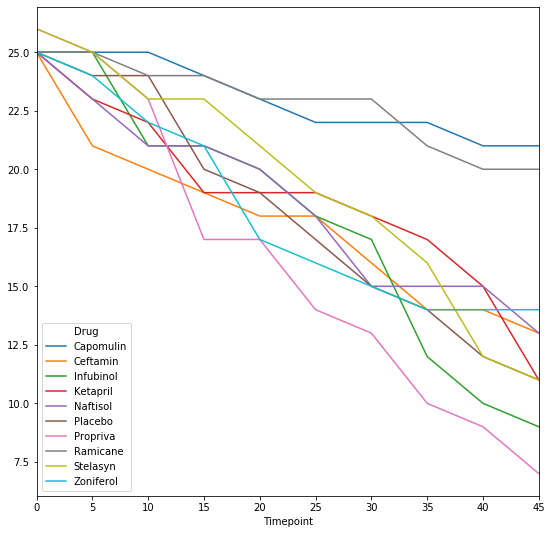

In [21]:
# Generate the Plot (Accounting for percentages)
import matplotlib.ticker as mtick
mouse_count.plot()
plt.rcParams["figure.figsize"] = (9,9)
#perc=np.linspace(0,100,len(t_df))


# Save the Figure

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug
change=df.pct_change(1, limit=None, freq=None).sum()*100
# Display the data to confirm
change.head(10) #Doesnt work.  Figures are off slightly.


Drug
Capomulin   -21.391539
Ceftamin     36.141889
Infubinol    38.746192
Ketapril     46.308083
Naftisol     44.193800
Placebo      42.393592
Propriva     39.543684
Ramicane    -24.865579
Stelasyn     42.945527
Zoniferol    39.068045
dtype: float64

In [23]:
# Calculate the percent changes for each drug
pct_change=((df.iloc[-1]-df.iloc[0])/df.iloc[0])*100
pct_change #This works!

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [24]:
pct_change.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [25]:
pct_change.values

array([-19.47530267,  42.51649186,  46.12347173,  57.02879469,
        53.92334713,  51.29796048,  47.24117486, -22.32090046,
        52.08513429,  46.57975087])

In [26]:
y=pct_change.values
y

array([-19.47530267,  42.51649186,  46.12347173,  57.02879469,
        53.92334713,  51.29796048,  47.24117486, -22.32090046,
        52.08513429,  46.57975087])

In [27]:
pct_change_df=pd.DataFrame(pct_change)
pct_change_df=pct_change_df.reset_index(inplace=False)
pct_change_df


,Drug,0
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [28]:
pct_change_df[0]

0   -19.475303
1    42.516492
2    46.123472
3    57.028795
4    53.923347
5    51.297960
6    47.241175
7   -22.320900
8    52.085134
9    46.579751
Name: 0, dtype: float64

In [29]:
x_axis = np.arange(len(pct_change.values))
x_axis


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
desired_array = pct_change.astype(np.int64)
desired_array.reset_index()
desired_array
#desired_array_str=np.array(map(str,desired_array))
#list(desired_array_str)
#percent_array=[s+"%" for s in desired_array_str]

Drug
Capomulin   -19
Ceftamin     42
Infubinol    46
Ketapril     57
Naftisol     53
Placebo      51
Propriva     47
Ramicane    -22
Stelasyn     52
Zoniferol    46
dtype: int64

In [31]:
new=pct_change_df.filter(['Drug'])

In [32]:
new['Change']=pct_change.values

In [33]:
new


,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


Drug
Capomulin   -21.391539
Ceftamin     36.141889
Infubinol    38.746192
Ketapril     46.308083
Naftisol     44.193800
Placebo      42.393592
Propriva     39.543684
Ramicane    -24.865579
Stelasyn     42.945527
Zoniferol    39.068045
dtype: float64


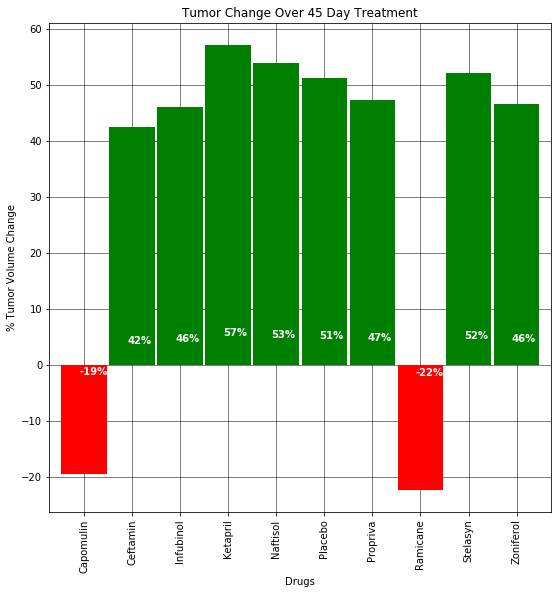

In [34]:
# Store all Relevant Percent Changes into a Tuplpe
# Splice the data between passing and failing drugs
fig,  ax=plt.subplots()
pct_change.plot(kind='bar', width=.95,color=(pct_change<0).map({False: 'g', True:'r'}))
print(change)
plt.xticks(x_axis, pct_change.index)

# Orient widths. Add labels, tick marks, etc. 
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

ax.set_axisbelow(True)
ax.grid(linestyle='-', linewidth='0.5', color='black',axis="both")
for i in x_axis:
    s1=("{0:.0%}".format(desired_array[i]/100))
    plt.text(x=x_axis[i]-.10,y=(y[i]*1.09)-y[i], s=s1, color='white', fontweight='bold')



# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

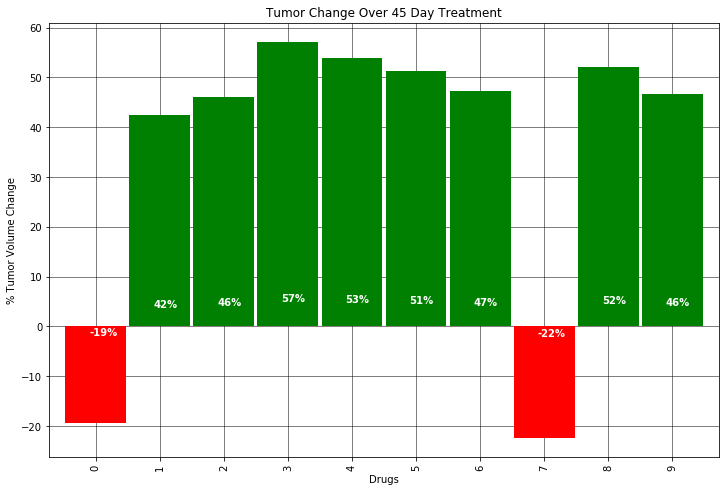

In [36]:
# Store all Relevant Percent Changes into a Tuplpe
# Splice the data between passing and failing drugs
fig,  ax=plt.subplots()
colors=tuple(np.where(pct_change<0, 'r', 'g'))
pct_change.plot(kind='bar', width=.95,color=colors)

plt.xticks(x_axis, new.index)

# Orient widths. Add labels, tick marks, etc. 
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

ax.set_axisbelow(True)
ax.grid(linestyle='-', linewidth='0.5', color='black',axis="both")
for i in x_axis:
    s1=("{0:.0%}".format(desired_array[i]/100))
    plt.text(x=x_axis[i]-.10,y=(y[i]*1.09)-y[i], s=s1, color='white', fontweight='bold')



# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()


In [136]:
print(new['Change'])

0   -19.475303
1    42.516492
2    46.123472
3    57.028795
4    53.923347
5    51.297960
6    47.241175
7   -22.320900
8    52.085134
9    46.579751
Name: Change, dtype: float64
